In [50]:
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


Light engine is now set up, and so it is now possible to access the methods from the REST API. 

In [51]:
from time import sleep

# code below blinks each of the LEDs in turn at max intensity ofr ~1s
for led in range(10):
    intensities = [0]*10
    intensities[led] = 4095
    d.set_spectrum_a(intensities)
    sleep(1.)
    d.turn_off()
    sleep(1.)

STLAB also has an on-board spectrometer, which can be used with sampling methods from pyplr.calibrate.SpectraTuneLabSampler, as seen below.

In [18]:
from pyplr.calibrate import SpectraTuneLabSampler

d = SpectraTuneLabSampler(password='2294b16eea08a15a')
leds = [0,1,2,3,4,5,6,7,8,9]
intensity = [4095]
d.sample(leds=leds, intensities=intensity)
d.make_dfs()
d.stlab_spectra

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info
Sampling 10 primaries at the following settings: [4095]
Measurement: 1 / 10, Primary: 0, Setting: 4095
Measurement: 2 / 10, Primary: 1, Setting: 4095
Measurement: 3 / 10, Primary: 2, Setting: 4095
Measurement: 4 / 10, Primary: 3, Setting: 4095
Measurement: 5 / 10, Primary: 4, Setting: 4095
Measurement: 6 / 10, Primary: 5, Setting: 4095
Measurement: 7 / 10, Primary: 6, Setting: 4095
Measurement: 8 / 10, Primary: 7, Setting: 4095
Measurement: 9 / 10, Primary: 8, Setting: 4095
Measurement: 10 / 10, Primary: 9, Setting: 4095


C:\Users\kebl6975\Documents\GitHub\cvd_pupillometry\pyplr\calibrate.py:97: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  self.stlab_spectra.columns = pd.Int64Index(self.wlbins)


,380,385,390,395,400,405,410,415,420,425,...,745,750,755,760,765,770,775,780,Primary,Setting
0,0.0,0.0,0.0,23.106876,64.863683,144.396339,262.397182,587.494483,1200.865206,2201.990076,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0,4095
1,0.0,0.0,0.0,0.000000,9.659671,17.604073,28.663043,63.555219,140.426339,306.942818,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1,4095
2,0.0,0.0,0.0,3.749379,2.075549,3.381136,3.381136,4.988013,9.139110,18.679940,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2,4095
3,0.0,0.0,0.0,16.655355,0.000000,0.000000,1.980461,0.000000,5.681651,12.434700,...,0.000000,11.915235,0.000000,0.0,0.0,0.0,0.0,0.0,3,4095
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.757944,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4,4095
5,0.0,0.0,0.0,2.639186,1.466215,3.577564,2.375268,2.111349,1.935403,1.964728,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5,4095
6,0.0,0.0,0.0,0.000000,14.439963,5.807664,8.553104,8.262721,18.241343,16.050270,...,43.319890,49.180351,36.324296,0.0,0.0,0.0,0.0,0.0,6,4095
7,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.067447,...,88.942395,80.714801,65.061277,0.0,0.0,0.0,0.0,0.0,7,4095
8,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.751418,...,3.268669,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,8,4095
9,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,9,4095


With this data, it is now possible to plot the spectral power distributions of the 10 channels at maximum and their CIE xy cromaticity coordinates, which define the gamut of the device. 
We can calculate the xy chromaticity coordinates quickly by passing spectra data frames to stlab.spectra_to_xyz(...).

Execution time summary:
count    400.000000
mean       0.124003
std        0.034032
min        0.100184
25%        0.115944
50%        0.118564
75%        0.125360
max        0.627789
dtype: float64


Text(0, 0.5, 'Execution time (s)')

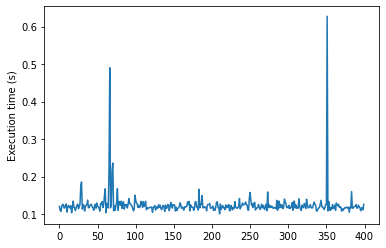

In [10]:
from time import time, sleep

import pandas as pd

on = [4095]*10
off = [0]*10
exec_times = []
for i in range(200):
    t1 = time()
    d.set_spectrum_a(on)
    t2 = time()
    sleep(.2)
    t3 = time()
    d.set_spectrum_a(off)
    t4 = time()
    exec_times.append(t2-t1)
    exec_times.append(t4-t3)

exec_times = pd.Series(exec_times)
print('Execution time summary:')
print(exec_times.describe())
ax = exec_times.plot()
ax.set_ylabel('Execution time (s)')

C:\Users\kebl6975\Documents\GitHub\cvd_pupillometry\pyplr\calibrate.py:368: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for led, df in self.data.groupby(["led"]):
C:\Users\kebl6975\Documents\GitHub\cvd_pupillometry\pyplr\calibrate.py:369: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lkp_tbl = lkp_tbl.append(self.interp_led_spectra(led, df))
C:\Users\kebl6975\Documents\GitHub\cvd_pupillometry\pyplr\calibrate.py:369: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lkp_tbl = lkp_tbl.append(self.interp_led_spectra(led, df))
C:\Users\kebl6975\Documents\GitHub\cvd_pupillometry\pyplr\calibrate.py:369: FutureWarning: The frame.append method is de

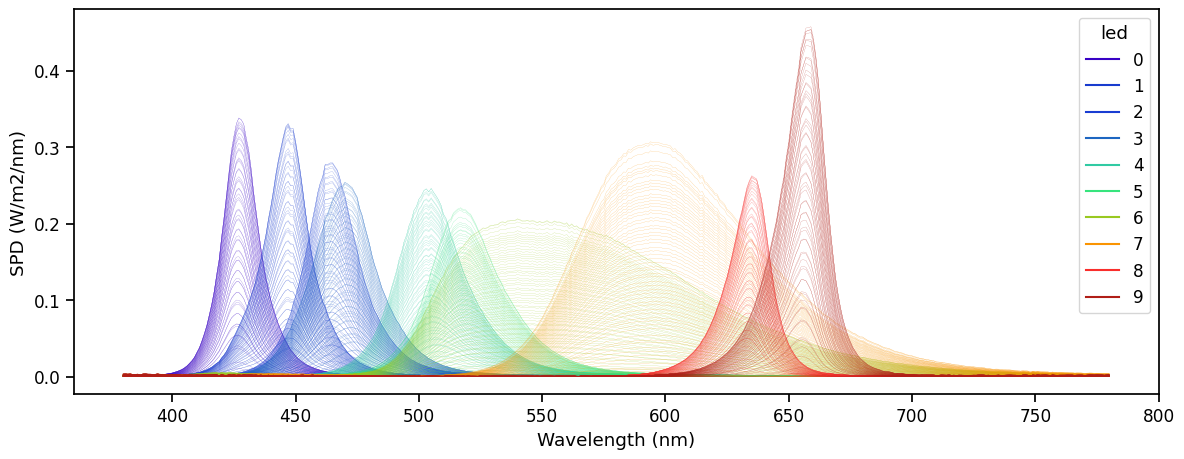

In [52]:
# from pyplr.calibrate import CalibrationContext as calibrationContext
import pyplr.calibrate as calb
from importlib import reload
reload(calb)
# file type to be read must be in format of:
# led | intensity | wavelength 1 (380) | wavelength 2 | ... | wavelength n (780)

cc = calb.CalibrationContext(
    'S2_corrected_oo_spectra.csv', binwidth=1)
_ = cc.plot_calibrated_spectra()


In [53]:
# calculate the peak spectral sensitivity for each LED at its maximum intensity setting
cc.lkp.xs(key=4095, level=1).idxmax(axis=1)

led
0    427
1    447
2    465
3    470
4    505
5    517
6    540
7    594
8    635
9    659
dtype: int64

In [54]:
blue_led = 3
red_led = 9
target_lux = 800

# Find the required intensity setting of the blue led for 800 lux
blue_intensity = (cc.lux.loc[blue_led].sub(target_lux)
                                      .abs()
                                      .idxmin())
#                                     .values[0])

# Find the intensity setting of the red led for 800 lux
red_intensity = cc.match(match_led=blue_led,
                         match_led_intensity=blue_intensity,
                         target_led=red_led,
                         match_type='irrad')[1]

C:\Users\kebl6975\Documents\GitHub\cvd_pupillometry\pyplr\CIE.py:5908: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  sss.index = pd.Int64Index(sss.index)


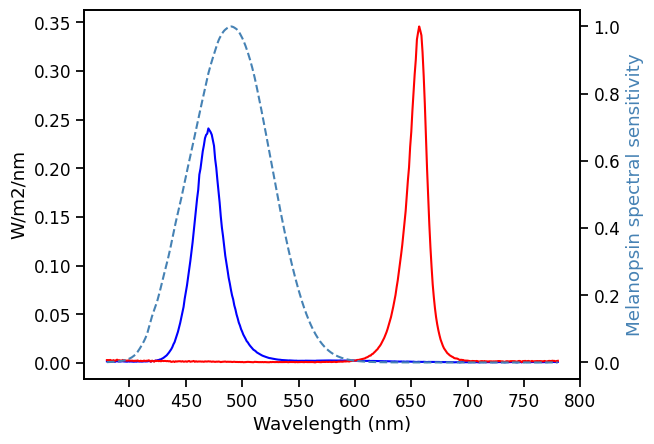

In [55]:
import matplotlib.pyplot as plt
from pyplr.CIE import get_CIES026

fig, ax = plt.subplots()
sss = get_CIES026(binwidth=1)
ax.plot(cc.lkp.loc[(blue_led, blue_intensity)], c='blue')
ax.plot(cc.lkp.loc[(red_led, red_intensity)], c='red')

ax2 = ax.twinx()
ax2.plot(sss['I'], ls='dashed', c='steelblue') # melanopsin = "I"
ax2.set_ylabel('Melanopsin spectral sensitivity', c='steelblue')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('W/m2/nm');

In [56]:
from pyplr import stlab

blue_spec, red_spec = [0]*10, [0]*10
blue_spec[blue_led] = blue_intensity
red_spec[red_led] = red_intensity



In [64]:
# code below blinks each of the LEDs in turn at max intensity of ~1s
for led in [3,9,3,9,3,9]:
    intensities = [0]*10
    if led == 3:
        intensities[led] = int(blue_intensity)
    else:
        intensities[led] = int(red_intensity)
    d.set_spectrum_a(intensities)
    sleep(1.)
    d.turn_off()
    sleep(10.)

In [63]:
intensities.type()

AttributeError: 'list' object has no attribute 'type'